In [ ]:
# https://github.com/alexeygrigorev/workshops/tree/main/mlzoomcamp-fastapi-uv
# https://www.youtube.com/watch?v=jzGzw98Eikk
# Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download
# Lessons: https://www.youtube.com/watch?v=FW_l7lB0HUI&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=43

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.replace(' ', '_').str.lower()

# print(df.columns)

# categorical = list(df.dtypes[df.dtypes == 'object'].index)
# categorical.remove('churn')

# numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [  'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

print(categorical)
print(numerical)

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(categorical_columns)

for c in categorical_columns:
  df[c] = df[c].str.replace(' ', '_').str.lower()

df.churn = (df.churn== 'yes').astype(int)

['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
['tenure', 'monthlycharges', 'totalcharges']
['customerid', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges', 'churn']


In [ ]:
df.isnull().sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges


In [ ]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
print(len(df_full_train))
print(len(df_test))

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
print(len(df_train))
print(len(df_val))

print(len(df_train) + len(df_val) + len(df_test) , len(df))

5634
1409
4225
1409
7043 7043


In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
from sklearn.feature_extraction import DictVectorizer


train_dict = df_train[categorical + numerical].to_dict(orient='records')
print(train_dict[0])

dv = DictVectorizer(sparse=False)

dv.fit(train_dict)

X_train = dv.fit_transform(train_dict)
print(X_train.shape)

dict_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dict_val)
print(X_val.shape)

{'gender': 'female', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'yes', 'phoneservice': 'yes', 'multiplelines': 'yes', 'internetservice': 'fiber_optic', 'onlinesecurity': 'yes', 'onlinebackup': 'yes', 'deviceprotection': 'yes', 'techsupport': 'yes', 'streamingtv': 'yes', 'streamingmovies': 'yes', 'contract': 'two_year', 'paperlessbilling': 'yes', 'paymentmethod': 'electronic_check', 'tenure': 72, 'monthlycharges': 115.5, 'totalcharges': 8425.15}
(4225, 45)
(1409, 45)


In [ ]:
from sklearn.linear_model import LogisticRegression

print(X_train.shape, y_train.shape)

print(y_train.shape)

#model = LogisticRegression(solver='liblinear', random_state=1)
#model.fit(X_train, y_train)
model = LogisticRegression()
model.fit(X_train, y_train)

model.intercept_
model.coef_.round(3)

# model.predict_proba(X_val)

(4225, 45) (4225,)
(4225,)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
        -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
        -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
         0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
        -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
         0.194, -0.098, -0.205, -0.072,  0.   ]])

In [ ]:
# use VAL !!!!
y_pred =  model.predict_proba(X_val)[:, 1]
print(y_pred)

churn_decision = (y_pred >= 0.5)
print(churn_decision)

df_val[churn_decision].customerid # People to churn

print(y_val)


churn_decision.astype(int)

(y_val == churn_decision).mean()

[0.00786347 0.20992803 0.2237105  ... 0.15014869 0.77668113 0.81035774]
[False False False ... False  True  True]
[0 0 0 ... 0 1 1]


np.float64(0.801277501774308)

**4.1 Accuracy and dummy model**

In [ ]:
len(y_val)

1409

In [ ]:
(y_val == churn_decision).sum() # 1132

np.int64(1129)

In [ ]:
thresholds = np.linspace(0, 1, 21)

scores = []
for t in thresholds:
  churn_decision = (y_pred >= t )
  score = (churn_decision == y_val).mean()
  scores.append( score)
  print('%.2f %.3f' %( t, score))

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


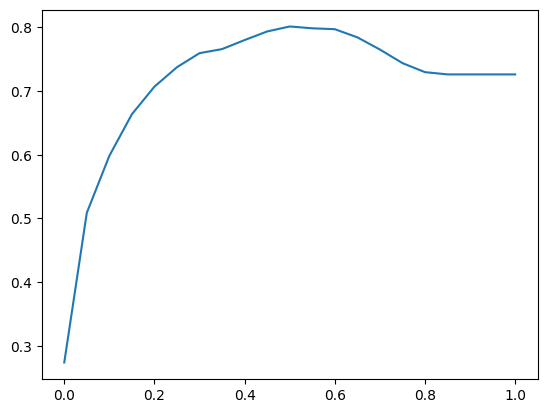

In [ ]:
plt.plot(thresholds, scores)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [ ]:
sk_scores = []
for t in thresholds:
  score = accuracy_score(y_val, y_pred >= t)
  print('%.2f %.3f' % (t, score))
  sk_scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


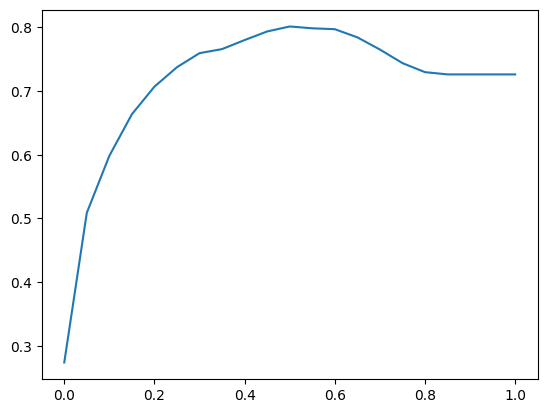

In [ ]:
plt.plot(thresholds, sk_scores)

In [ ]:
print(y_pred)
y_pred >= 1

[0.00786347 0.20992803 0.2237105  ... 0.15014869 0.77668113 0.81035774]


array([False, False, False, ..., False, False, False])

In [ ]:
from collections import Counter

Counter(y_pred >=1)

#Dummy model produce all people NOT churn

Counter({np.False_: 1409})

**3. Confusion table**

In [ ]:
# Class Imbalance => accuracy is not representative => misleading
# True positive: we predict the correct
# True negative: we predict the correct
# False positive
# False negative
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

actual_negative


array([ True,  True,  True, ...,  True, False, False])

In [ ]:
t = 0.5
predic_positive = (y_pred >= t)
predict_negative = (y_pred < t)

predict_negative

array([ True,  True,  True, ...,  True, False, False])

In [ ]:
tp = (predic_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predic_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

print(tp, tn, fp, fn, 'all:', (tp + tn + fp + fn))



214 915 108 172 all: 1409


In [ ]:
# we can create now :
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])

confusion_matrix

array([[915, 108],
       [172, 214]])

Evaluation metrics: session overview


In [ ]:
(confusion_matrix / confusion_matrix.sum()).round(2)

# fp: 8% and fn: 12%  make us lost money
# accuracy : 80% => tn:65%, tp: 15%

array([[0.65, 0.08],
       [0.12, 0.15]])

**4. Precision and Recall**

In [ ]:
accurracy = (tp + tn)/(tp + tn + fp + fn)
accurracy

np.float64(0.801277501774308)

In [ ]:
# Precision: fraction of correct predictions
#            only interested in churning!
# Precision = tp / (tp + fp)
precision = tp/(tp + fp)
precision.round(2)

np.float64(0.66)

In [ ]:
# Recall: fraction of correctly identified
recall = tp / (tp + fn)
recall.round(2)

# Meaning 45% is not correctly classified !!

np.float64(0.55)

ROC Curves



In [ ]:
# ROC: receiving objectiv characteristics
#TPR and FPR

true_positive_rate = tp/(tp + fn) # all the positive ratio
print(true_positive_rate)
print(recall)

0.5544041450777202
0.5544041450777202


In [ ]:
false_positive_rate = fp/(fp + tn) #
print(false_positive_rate)



0.10557184750733138


In [ ]:
scores = []
thresholds =  np.linspace(0, 1, 101)

for t in thresholds:
  predic_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predic_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predic_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()
  scores.append((t, tp, fp, fn, tn))

scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(903), np.int64(1), np.int64(120)),
 (np.float64(0.02), np.int64(384), np.int64(812), np.int64(2), np.int64(211)),
 (np.float64(0.03), np.int64(382), np.int64(753), np.int64(4), np.int64(270)),
 (np.float64(0.04), np.int64(380), np.int64(708), np.int64(6), np.int64(315)),
 (np.float64(0.05), np.int64(378), np.int64(684), np.int64(8), np.int64(339)),
 (np.float64(0.06), np.int64(376), np.int64(660), np.int64(10), np.int64(363)),
 (np.float64(0.07), np.int64(374), np.int64(631), np.int64(12), np.int64(392)),
 (np.float64(0.08), np.int64(371), np.int64(601), np.int64(15), np.int64(422)),
 (np.float64(0.09), np.int64(369), np.int64(569), np.int64(17), np.int64(454)),
 (np.float64(0.1), np.int64(367), np.int64(547), np.int64(19), np.int64(476)),
 (np.float64(0.11), np.int64(365), np.int64(520), np.int64(21), np.int64(503)),
 (np.float64(0.12), np.int64(363), np.int64(503),

In [ ]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores


,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,903,1,120
2,0.02,384,812,2,211
3,0.03,382,753,4,270
4,0.04,380,708,6,315
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [ ]:
# true_positive_rate = tp/(tp + fn) # all the positive ratio
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,367,547,19,476,0.950777,0.534702
20,0.2,334,361,52,662,0.865285,0.352884
30,0.3,291,244,95,779,0.753886,0.238514
40,0.4,253,177,133,846,0.655440,0.173021
50,0.5,214,108,172,915,0.554404,0.105572
60,0.6,153,53,233,970,0.396373,0.051808
70,0.7,69,14,317,1009,0.178756,0.013685
80,0.8,5,0,381,1023,0.012953,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


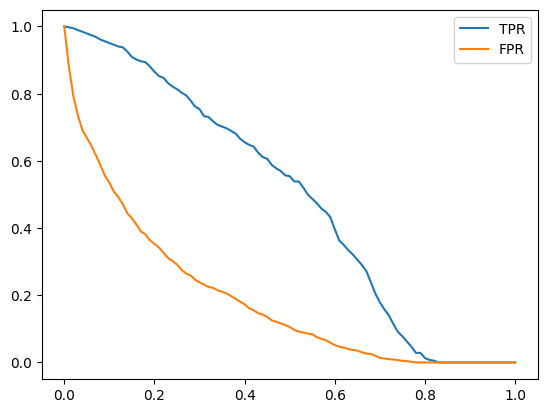

In [ ]:
plt.plot(thresholds, df_scores.tpr, label='TPR')
plt.plot(thresholds, df_scores.fpr, label='FPR')
plt.legend()

Random model

In [ ]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [ ]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [ ]:
def trp_fpr_dataframe (y_val, y_pred):
  scores = []
  thresholds =  np.linspace(0, 1, 101)

  for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predic_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predic_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predic_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

  return df_scores


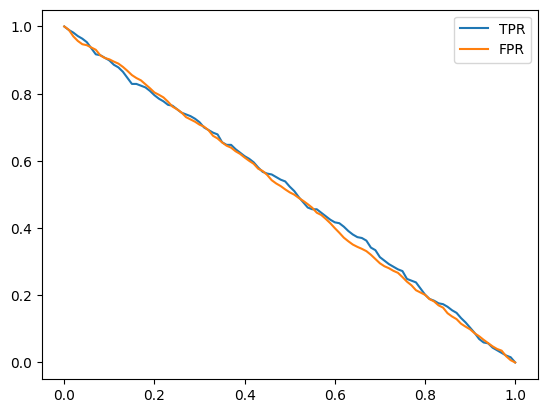

In [ ]:
df_rand = trp_fpr_dataframe(y_val, y_rand)
df_rand[::10]

plt.plot(thresholds, df_rand.tpr, label='TPR')
plt.plot(thresholds, df_rand.fpr, label='FPR')
plt.legend()

Ideal model

In [ ]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos

(np.int64(1023), np.int64(386))

In [ ]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

1 - y_val.mean()

np.float64(0.7260468417317246)

In [ ]:
((y_ideal_pred >= 0.726) == y_ideal).mean() # Why y_ideal_prd == y_ideal ?
  # dont get it !!! TO CHECK

np.float64(1.0)

In [ ]:
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

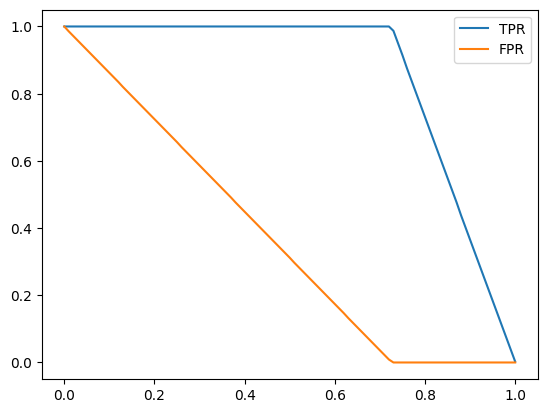

In [ ]:
df_ideal = trp_fpr_dataframe(y_ideal,y_ideal_pred)
df_ideal[::10]

plt.plot(thresholds, df_ideal.tpr, label='TPR')
plt.plot(thresholds, df_ideal.fpr, label='FPR')
plt.legend()

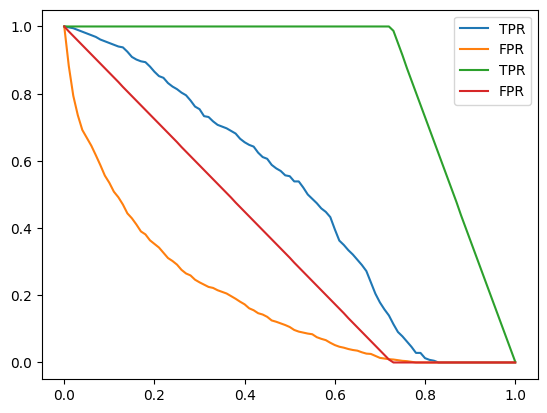

In [ ]:
plt.plot(thresholds, df_scores.tpr, label='TPR')
plt.plot(thresholds, df_scores.fpr, label='FPR')

# plt.plot(thresholds, df_rand.tpr, label='TPR')
# plt.plot(thresholds, df_rand.fpr, label='FPR')

plt.plot(thresholds, df_ideal.tpr, label='TPR')
plt.plot(thresholds, df_ideal.fpr, label='FPR')

plt.legend()

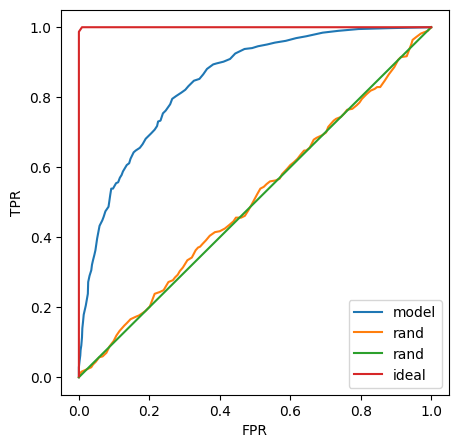

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='rand')
plt.plot([0, 1], [0, 1], label='rand')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

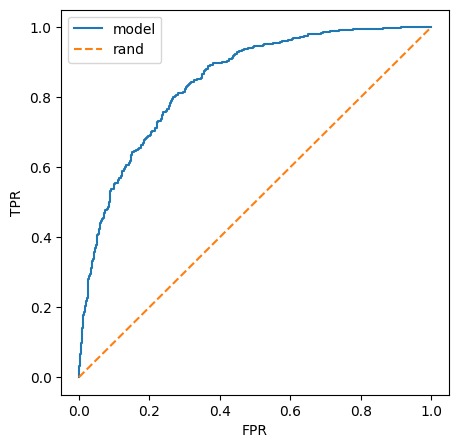

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, th = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='rand', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

ROC AUC

Cross-Validation

Summary

Explore more

In [ ]:
from sklearn.metrics import auc

auc_ = auc(fpr, tpr)

b = auc(tpr, fpr)

auc_, b

(np.float64(0.8445038720820102), np.float64(0.15549612791798986))

In [ ]:
auc(df_scores.fpr, df_scores.tpr)

np.float64(0.8443696534119398)

In [ ]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

np.float64(0.8445038720820102)

In [ ]:
# auc: posibility of randoly select a positive exemple over a negative exemple

In [ ]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

import random

n=100000
success = 0

for i in range(n):
  pos_i = random.randint(0, len(pos) - 1)
  neg_i = random.randint(0, len(neg) - 1)

  if pos[pos_i] > neg[neg_i]:
    success = success + 1

success /n

0.84462

In [ ]:
def train(df, y_train):
  dicts = df[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression()
  model.fit(X_train, y_train)

  return dv, model

In [ ]:
dv, model = train(df_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def predict(df, dv, model):
   dicts = df[categorical + numerical].to_dict(orient='records')
   X = dv.transform(dicts)
   y_pred = model.predict_proba(X)[:, 1]

   return y_pred

In [ ]:
y_pred = predict(df_val, dv, model)